# 問題①

## 問1

S→A→C→G、S→A→D→GとS→B→C→Gの3つの経路を使い、それぞれS→Aは18トン、S→Bは6トン、A→Cは9トン、A→D は9トン、B→C は6トン、C→Gは15トン、D→Gは9トンを運び、そのときの総費用は4億7520万円です。

S→Aは上限の18トン運んでいます。スタートではAかBの2択ですが、Aの費用600万円はBの費用750万円より安いことから納得でしょう。


In [1]:
from pulp import *
prob = LpProblem("総費用", sense=LpMinimize)

sa = LpVariable("SからA", lowBound=0)
sb = LpVariable("SからB", lowBound=0)
ac = LpVariable("AからC", lowBound=0)
ad = LpVariable("AからD", lowBound=0)
bc = LpVariable("BからC", lowBound=0)
cg = LpVariable("CからG", lowBound=0)
dg = LpVariable("DからG", lowBound=0)

# 費用最小化
prob += 600 * sa + 750 * sb + 900 * ac + 660 * ad + 840 * bc + 570 * cg + 510 * dg

# 運送
prob += sa + sb == 24
prob += sa - ac - ad == 0
prob += sb - bc == 0
prob += ac + bc - cg == 0
prob += ad - dg == 0
prob += cg + dg == 24


# 制約
prob += sa <= 18
prob += sb <= 12
prob += ac <= 12
prob += ad <= 9
prob += bc <= 15
prob += cg <= 24
prob += dg <= 15

prob.solve()


print("SからA:", sa.value())
print("SからB:", sb.value())
print("AからC:", ac.value())
print("AからD:", ad.value())
print("BからC:", bc.value())
print("CからG:", cg.value())
print("DからG:", dg.value())

total_costs = (
    600 * sa.value()
    + 750 * sb.value()
    + 900 * ac.value()
    + 660 * ad.value()
    + 840 * bc.value()
    + 570 * cg.value()
    + 510 * dg.value()
)

print("総費用:", total_costs)

SからA: 18.0
SからB: 6.0
AからC: 9.0
AからD: 9.0
BからC: 6.0
CからG: 15.0
DからG: 9.0
総費用: 47520.0


最小化なので、`LpProblem()のsense=LpMinimize`とします。最小化がデフォルトなので省略することもできます。
運送:各経路の輸送量の制約です。

たとえば、スタート地点から総量24トンの水が、S→AまたはS→Bの経路を使って運ばれるので、これら経路の輸送量の合計は24になります。それが、`sa + sb == 24`です。

同様に、Aを起点とすると、A→CとA→Dの2つの経路がありますが、これら経路の輸送量の合計は、Aに運ばれた水量と同じでないといけません。それが、`sa - ac - ad == 0`(もしくは、`sa=ac+ad`)です。

制約:経路ごとの運べる水量の上限です。表の数字をそのまま使います。


## 問2

S→A→D→GとS→Gの2つの経路を使い、それぞれS→Aは9トン、A→D は9トン、D→Gは9トン、S→Gは15トンを運び、そのときの総費用は4億2930万円です。それ以外のS→B、A→C、B→C、C→Gは0トンで、使用されません。

新しい幹線道路を使用することで費用が低く抑えられていることがわかります。問1で費用が高くついていたS→B経路はもはや使われなくなります。

また、Aを選択後の経路ですが、C→GもしくはD→Gの選択のうち、Cの費用570万円はDの費用510万円より高いことから、C→Gの経路を使わず、D→Gが選択されています。D→Gの輸送上限15トンより少ない輸送量なので、Dに集中させることが可能です。


In [2]:
from pulp import *

prob = LpProblem("総費用", sense=LpMinimize)

sa = LpVariable("SからA", lowBound=0)
sb = LpVariable("SからB", lowBound=0)
ac = LpVariable("AからC", lowBound=0)
ad = LpVariable("AからD", lowBound=0)
bc = LpVariable("BからC", lowBound=0)
cg = LpVariable("CからG", lowBound=0)
dg = LpVariable("DからG", lowBound=0)
sg = LpVariable("SからG", lowBound=0)

prob += (
    600 * sa
    + 750 * sb
    + 900 * ac
    + 660 * ad
    + 840 * bc
    + 570 * cg
    + 510 * dg
    + 1800 * sg
)

prob += sa + sb + sg == 24
prob += sa - ac - ad == 0
prob += sb - bc == 0
prob += ac + bc - cg == 0
prob += ad - dg == 0
prob += cg + dg + sg == 24


prob += sa <= 18
prob += sb <= 12
prob += ac <= 12
prob += ad <= 9
prob += bc <= 15
prob += cg <= 24
prob += dg <= 15
prob += sg <= 30

prob.solve()


print("SからA:", sa.value())
print("SからB:", sb.value())
print("AからC:", ac.value())
print("AからD:", ad.value())
print("BからC:", bc.value())
print("CからG:", cg.value())
print("DからG:", dg.value())
print("SからG:", sg.value())

total_costs = (
    600 * sa.value()
    + 750 * sb.value()
    + 900 * ac.value()
    + 660 * ad.value()
    + 840 * bc.value()
    + 570 * cg.value()
    + 510 * dg.value()
    + 1800 * sg.value()
)

print("総費用:", total_costs)

SからA: 9.0
SからB: 0.0
AからC: 0.0
AからD: 9.0
BからC: 0.0
CからG: -0.0
DからG: 9.0
SからG: 15.0
総費用: 42930.0


S→Gに対応する部分を追加します。

運送:スタート地点から総量24トンの水が、S→A、S→BまたはS→Gの経路を使って運ばれるので、これら経路の輸送量の合計は24になります。それが、`sa + sb + sg == 24`です。

同様に、ゴール地点につながるすべての経路の輸送量の合計も24になります。それが、`cg + dg + sg == 24`です。


### 補足説明1

問題文の図は、次のように入力すれば描けます。

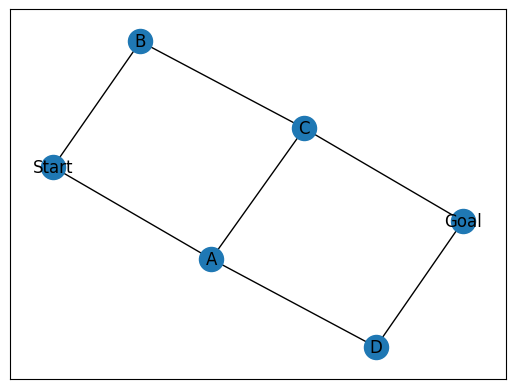

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("Start")
G.add_node("Goal")

G.add_edge("Start", "A")
G.add_edge("Start", "B")
G.add_edge("A", "C")
G.add_edge("A", "D")
G.add_edge("B", "C")
G.add_edge("C", "Goal")
G.add_edge("D", "Goal")

pos = nx.spring_layout(G, seed=7)


# nodes
nx.draw_networkx_nodes(G, pos)

# edges
nx.draw_networkx_edges(G, pos)

# node labels
nx.draw_networkx_labels(G, pos)

plt.show()

### 補足説明2

問1の解答を図にするには次のようにします。

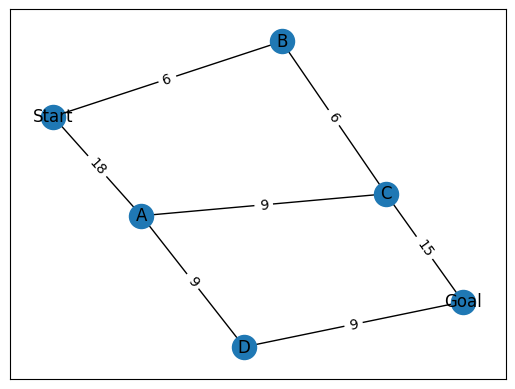

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("Start")
G.add_node("Goal")

G.add_edge("Start", "A", weight=18)
G.add_edge("Start", "B", weight=6)
G.add_edge("A", "C", weight=9)
G.add_edge("A", "D", weight=9)
G.add_edge("B", "C", weight=6)
G.add_edge("C", "Goal", weight=15)
G.add_edge("D", "Goal", weight=9)

pos = nx.spring_layout(G, seed=7)

# nodes
nx.draw_networkx_nodes(G, pos)

# edges
nx.draw_networkx_edges(G, pos)

# node labels
nx.draw_networkx_labels(G, pos)

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

# 問題②

問題①の解法は線形の場合のみです。非線形の場合について問題②で見ていきましょう。

## 問1



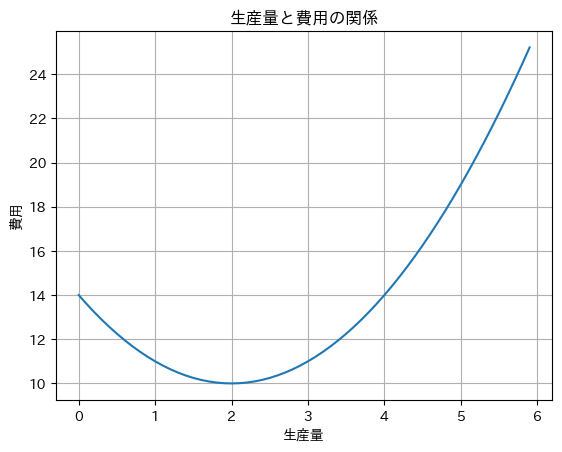

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import numpy as np


x = np.arange(0, 6, 0.1)
y = x**2 - 4 * x + 14

plt.plot(x, y)
plt.title("生産量と費用の関係")
plt.xlabel("生産量")
plt.ylabel("費用")
plt.grid(True)
plt.show()

最初のうちは生産量の増加とともに単位当たりの費用は下がりますが、やがて生産量の増加とともに単位当たりの費用が増加します。

たとえば、化学薬品の生産に大きな工場設備がいる場合、最初のうちは設備投資のため費用が高くなります。徐々に設備投資の元が取れ始めて費用が下がりますが、増産しすぎると現在の設備では手に負えなくなって、費用が上がり始めるのです。



## 問2

2トン生産し、そのときの単位当たりの費用は10億円です。

費用最小化の問題

$$
\underset {x}{\min} \ x^2-4x+14  \text{, where $x \geq 0$}
$$

は、以下で解けます。

In [7]:
from scipy.optimize import minimize

def f(x):
    y = x**2 - 4 * x + 14
    return y

x0 = 0

print(minimize(f, x0).x)
print(minimize(f, x0).fun)

[2.00000002]
10.0


`scpy.optimize`は制約付き目的関数の最適化に使います。

`minimize(f, x0)`には、関数`f`と初期値`x0`を入れます。

`.x`は費用を最小化する`x`の値、`.fun`は最小であるときの生産費用を表示します。

ちなみに、`x0=3` とした場合の結果は以下です。だいたい同じです。


In [8]:
from scipy.optimize import minimize

def f(x):
    y = x**2 - 4 * x + 14
    return y

x0 = 3

print(minimize(f, x0).x)
print(minimize(f, x0).fun)

[1.99999999]
10.0


なぜ初期値を設定するのかと疑問に思われる方もいるようなので補足しましょう。初期値は試行錯誤するための出発点です。とりあえずどこかからはじめて、もっと良いものがないかを繰り返して、修正（アップデート）していくことで答えにたどり着くといったイメージです。このため、そうしたとりあえずの出発点を指定してあげる必要があります。こうした初期値の設定はここでの演算に限らず、他の演算にも見られます。